In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
except:
  print("Installing Corresponing Dependencies")
  ! pip install qiskit
  ! pip install pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile

Dependencies are already installed. Skipping...


In [2]:
# fetch backend
backend = Aer.get_backend('statevector_simulator')

In [3]:
!rm -r modules

In [4]:
# import modules
import requests
from pathlib import Path
import os


directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)
  
helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [5]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement


In [6]:
# instance circuit
QUBIT_NUM = 4
MEASUREMENT_NUM = 4

# Quantum Increment 

In [7]:
qr = QuantumRegister(QUBIT_NUM)
cr = ClassicalRegister(QUBIT_NUM)
qc = QuantumCircuit(qr,cr)

In [8]:
# initialize circuit
target_init_qubit = [0,2,3]
initialize_quantum_circuit(qc,target_init_qubit)
qc.barrier()

In [9]:
len(qc.qubits)

4

In [10]:
# implement the quantum circuit
for i in range(QUBIT_NUM-1):
  qc.mct(list(reversed(qc.qubits[i+1:])),qr[i])

qc.x(qc.qubits[-1])

In [11]:
qc.barrier()

In [12]:
# make a measurement 
output_qubits = list(range(QUBIT_NUM))
make_meaurement(qc,qr,cr,output_qubits)

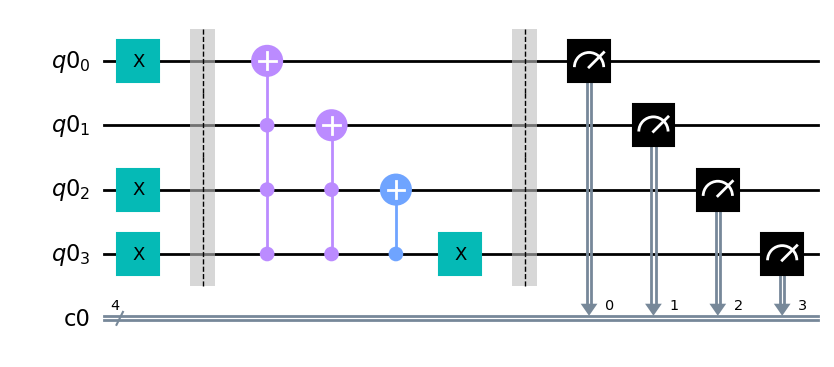

In [13]:
qc.draw("mpl")

In [14]:
output = ideal_qc_simulation(qc,backend,1)

In [15]:
output = list(output.keys())[0]

In [16]:
output = reverse_output(output)
output

'1100'

# Quantum Decrement

In [17]:
qr = QuantumRegister(QUBIT_NUM)
cr = ClassicalRegister(QUBIT_NUM)
qc = QuantumCircuit(qr,cr)

In [18]:
# initialize circuit
target_init_qubit = [0,2,3]
initialize_quantum_circuit(qc,target_init_qubit)
qc.barrier()

In [19]:
# implement the quantum circuit
qc.x(qc.qubits[-1])
for i in reversed(range(1,QUBIT_NUM)):
  qc.mct(list(reversed(qc.qubits[i:])),qr[i-1])

In [20]:
qc.barrier()

In [21]:
# make a measurement 
output_qubits = list(range(QUBIT_NUM))
make_meaurement(qc,qr,cr,output_qubits)

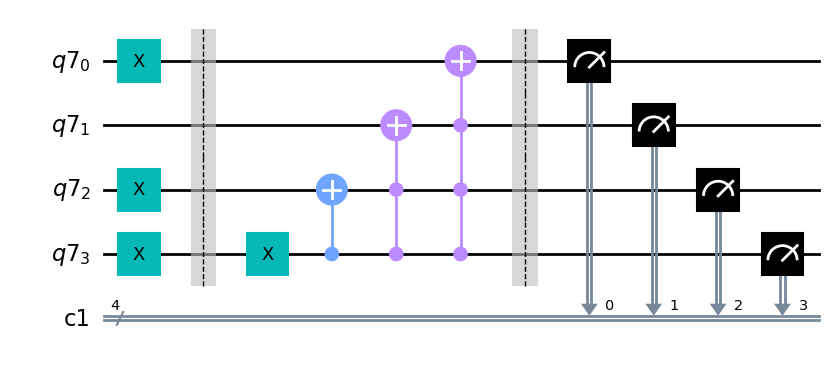

In [22]:
qc.draw("mpl")

In [23]:
output = ideal_qc_simulation(qc,backend,1)

In [24]:
output = list(output.keys())[0]

In [25]:
output = reverse_output(output)
output

'1010'

# Implement Functions

In [26]:
def increment_circuit(num_qubits):
  # instance quantum circuit
  qr = QuantumRegister(num_qubits)
  qc = QuantumCircuit(qr)

  # implement the quantum circuit
  for i in range(num_qubits-1):
    qc.mct(list(reversed(qc.qubits[i+1:])),qr[i])

  qc.x(qc.qubits[-1])

  return qc

def decrement_circuit(num_qubits):
  # instance quantum circuit
  qr = QuantumRegister(num_qubits)
  qc = QuantumCircuit(qr)

  # implement the quantum circuit
  qc.x(qc.qubits[-1])
  
  for i in reversed(range(1,num_qubits)):
    qc.mct(list(reversed(qc.qubits[i:])),qr[i-1])

  return qc

In [27]:
qr = QuantumRegister(8)
cr = ClassicalRegister(8)
qc = QuantumCircuit(qr,cr)

In [28]:
qubits = [0,1,2,3,4,5]
initialize_quantum_circuit(qc,qubits)

In [29]:
qc.barrier()

In [30]:
increment = increment_circuit(8)
qc.append(increment,[0,1,2,3,4,5,6,7])

In [31]:
qc.barrier()

In [32]:
# make a measurement 
output_qubits = list(range(8))
make_meaurement(qc,qr,cr,output_qubits)

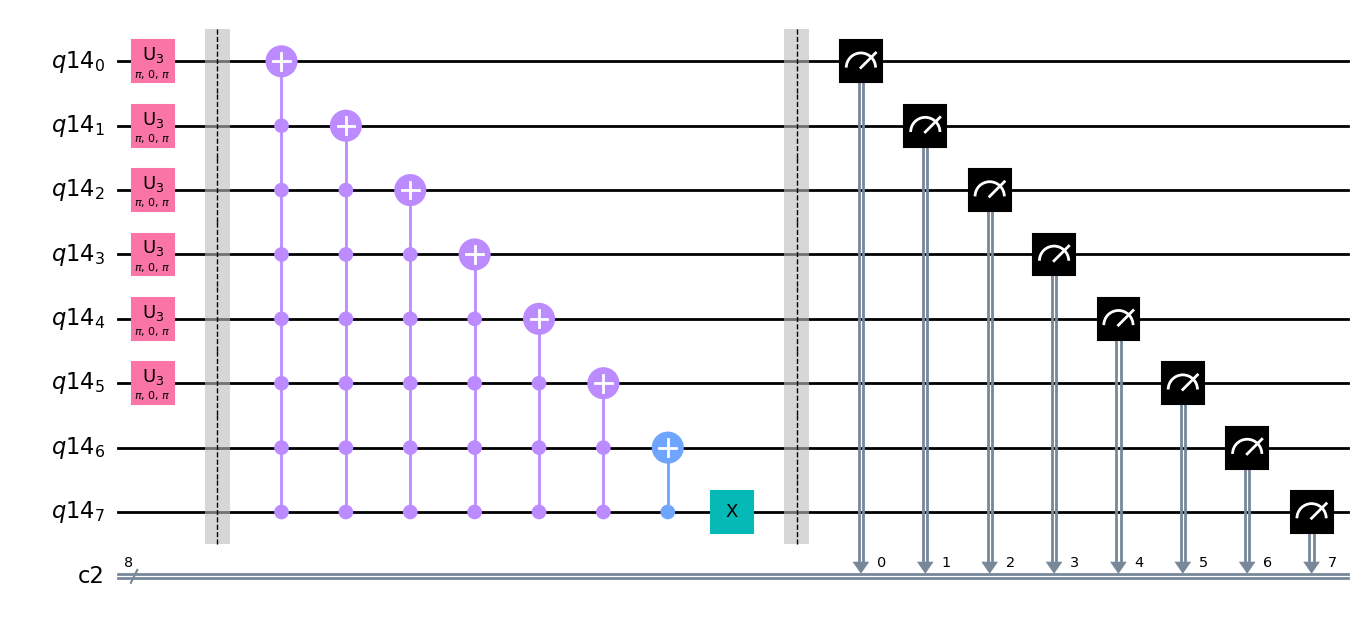

In [33]:
qc.decompose().draw("mpl")

In [34]:
output = ideal_qc_simulation(qc,backend,1)
output = list(output.keys())[0]
output = reverse_output(output)
output

'11111101'